# NVIDIA Stocks Analysis

- NVIDIA Stock Analysis (2015–2024): EDA & Predictive Modeling
This project analyzes NVIDIA's stock performance using Exploratory Data Analysis (EDA) and Gradient Boosting Regressor to predict price trends.\
- We examine OHLCV data, technical indicators (RSI, Bollinger Bands), and volatility to generate actionable insights for traders and investors. Visualizations highlight key patterns, while ML models assess short-term predictability.

- Data: NVIDIA Stocks 2015-2024 (OHLCV + Adj. Close)
- Tools: Python (Pandas, Matplotlib, Seaborn, Scikit-learn, mplfinance)
- Models: Gradient Boosting Regressor (Price Prediction)
- Output: Interactive Power BI dashboards & Jupyter Notebook analysis

- (Focus: Trend analysis, volatility insights, and ML-driven price forecasting)

# 01- Import libraries

In [93]:
pip install mplfinance pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.8 MB/s eta 0:00:00


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 02- Load dataset

In [77]:
gpu = pd.read_csv("nvidia_stock_2015_to_2024.csv")
gpu.head()

,Unnamed: 0,date,open,high,low,close,adjclose,volume
0,0,2015-01-02,0.50325,0.50700,0.49525,0.50325,0.483218,113680000
1,1,2015-01-05,0.50325,0.50475,0.49250,0.49475,0.475056,197952000
2,2,2015-01-06,0.49550,0.49600,0.47925,0.47975,0.460654,197764000
3,3,2015-01-07,0.48325,0.48750,0.47700,0.47850,0.459453,321808000
4,4,2015-01-08,0.48400,0.49950,0.48375,0.49650,0.476737,283780000


# 03- Basic EDA steps

In [78]:
gpu.shape

(2369, 8)

In [79]:
gpu.columns

Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'adjclose',
       'volume'],
      dtype='object')

In [80]:
gpu.isnull().sum()

,0
Unnamed: 0,0
date,0
open,0
high,0
low,0
close,0
adjclose,0
volume,0


In [81]:
print(gpu.isna().sum())

Unnamed: 0    0
date          0
open          0
high          0
low           0
close         0
adjclose      0
volume        0
dtype: int64


In [82]:
print(f"\nTotal NaN values in dataset: {gpu.isna().sum().sum()}")


Total NaN values in dataset: 0


In [83]:
print(gpu.info())
print(gpu.describe())

# Convert date to datetime and set as index
gpu['date'] = pd.to_datetime(gpu['date'])
gpu.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2369 non-null   int64  
 1   date        2369 non-null   object 
 2   open        2369 non-null   float64
 3   high        2369 non-null   float64
 4   low         2369 non-null   float64
 5   close       2369 non-null   float64
 6   adjclose    2369 non-null   float64
 7   volume      2369 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 148.2+ KB
None
        Unnamed: 0         open         high          low        close  \
count  2369.000000  2369.000000  2369.000000  2369.000000  2369.000000   
mean   1184.000000    14.188477    14.445906    13.919531    14.197878   
std     684.015716    18.683473    19.020099    18.315670    18.691694   
min       0.000000     0.481250     0.487500     0.473500     0.478500   
25%     592.000000     2.998250     3.045500 

In [84]:
gpu = gpu.rename(columns={'Unnamed: 0': 'S.no'})
gpu.head()

,S.no,open,high,low,close,adjclose,volume
date,,,,,,,
2015-01-02,0,0.50325,0.50700,0.49525,0.50325,0.483218,113680000
2015-01-05,1,0.50325,0.50475,0.49250,0.49475,0.475056,197952000
2015-01-06,2,0.49550,0.49600,0.47925,0.47975,0.460654,197764000
2015-01-07,3,0.48325,0.48750,0.47700,0.47850,0.459453,321808000
2015-01-08,4,0.48400,0.49950,0.48375,0.49650,0.476737,283780000


# 04- Normal Distribution of Data
- Normally Distributed: Bell-shaped curve with mean ≈ median

- Right-Skewed: Long tail to the right (mean > median)

- Left-Skewed: Long tail to the left (mean < median)

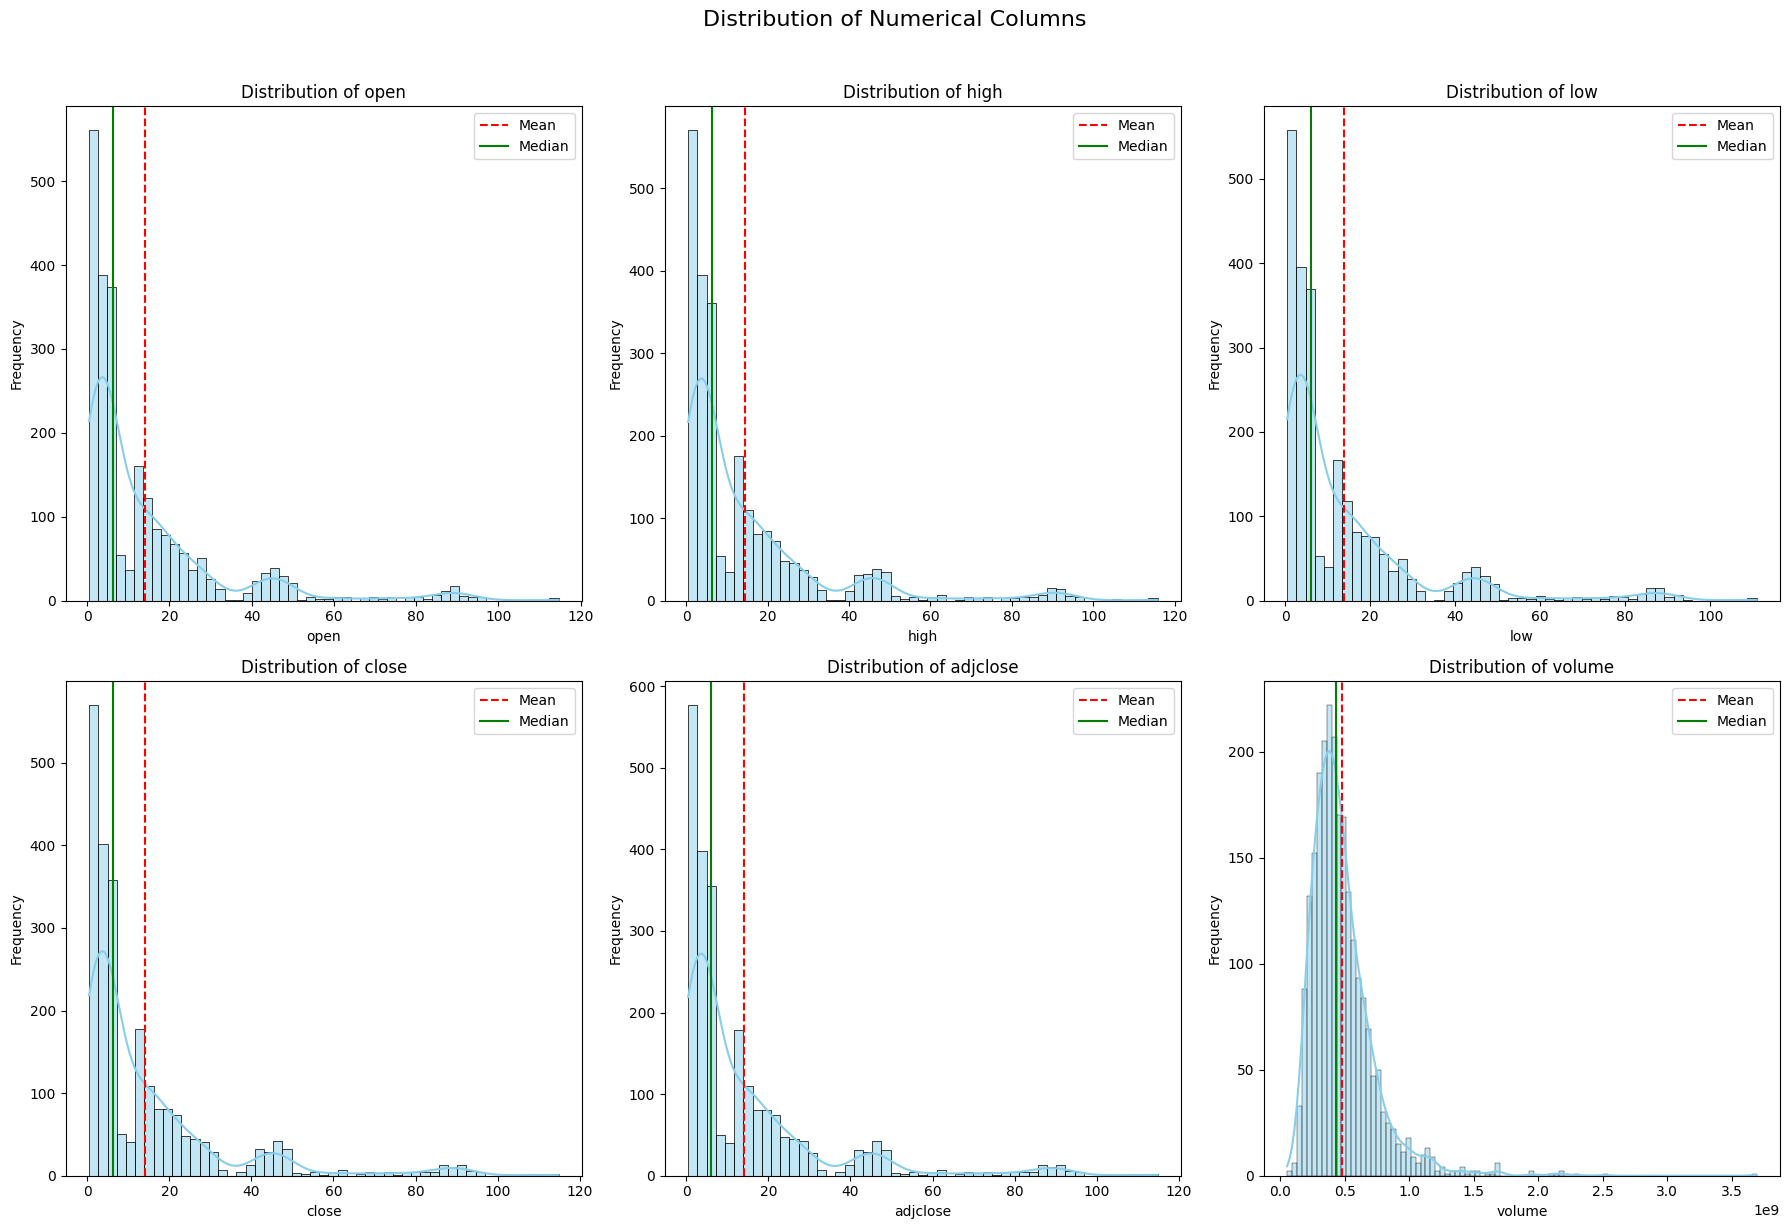

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding date and serial number)
numerical_cols = ['open', 'high', 'low', 'close', 'adjclose', 'volume']

# Set up the subplot grid
plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Numerical Columns', fontsize=16, y=1.02)

# Create histograms for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(gpu[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

    # Add vertical line for mean
    plt.axvline(gpu[col].mean(), color='red', linestyle='--', label='Mean')

    # Add vertical line for median
    plt.axvline(gpu[col].median(), color='green', linestyle='-', label='Median')
    plt.legend()

plt.tight_layout()
plt.show()

# 05- Data Visualizations

In [86]:
# 1. Calculate Daily Returns
gpu['daily_return'] = gpu['close'].pct_change() * 100

# 2. Calculate Volatility (rolling 30-day std)
gpu['volatility_30d'] = gpu['daily_return'].rolling(window=30).std()

# 3. Moving Averages
gpu['MA_50'] = gpu['close'].rolling(window=50).mean()
gpu['MA_200'] = gpu['close'].rolling(window=200).mean()

# 4. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

gpu['RSI'] = calculate_rsi(gpu)

# 5. High-Low Percentage
gpu['HL_Pct'] = (gpu['high'] - gpu['low']) / gpu['close'] * 100

# 6. Volume analysis
gpu['volume_ma_20'] = gpu['volume'].rolling(window=20).mean()

# 7. Maximum Drawdown
rolling_max = gpu['close'].rolling(window=252, min_periods=1).max()
daily_drawdown = gpu['close']/rolling_max - 1.0
max_daily_drawdown = daily_drawdown.rolling(window=252, min_periods=1).min()
gpu['max_drawdown'] = max_daily_drawdown

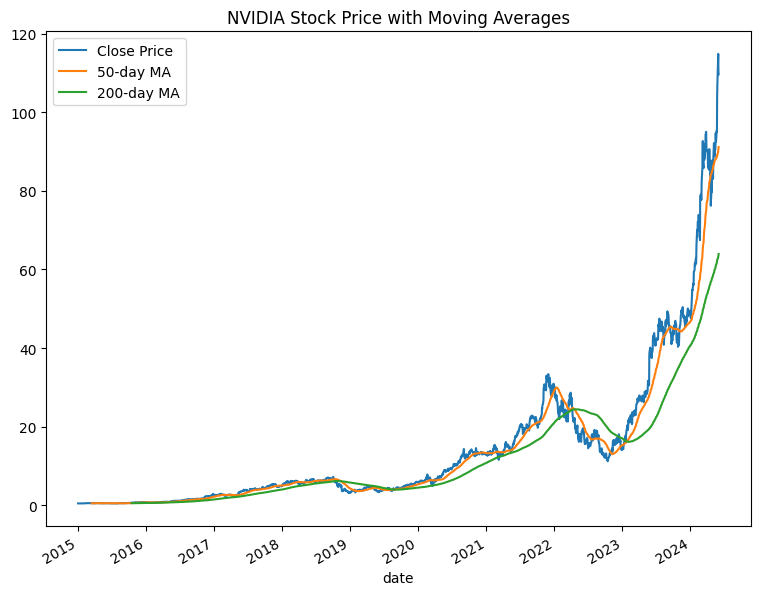

In [87]:
plt.figure(figsize=(20, 16))  # Make the overall figure much larger
# Price and Moving Averages
plt.subplot(2, 2, 1)
gpu['close'].plot(label='Close Price')
gpu['MA_50'].plot(label='50-day MA')
gpu['MA_200'].plot(label='200-day MA')
plt.title('NVIDIA Stock Price with Moving Averages')
plt.legend()

Text(0.5, 1.0, 'Daily Returns (%)')

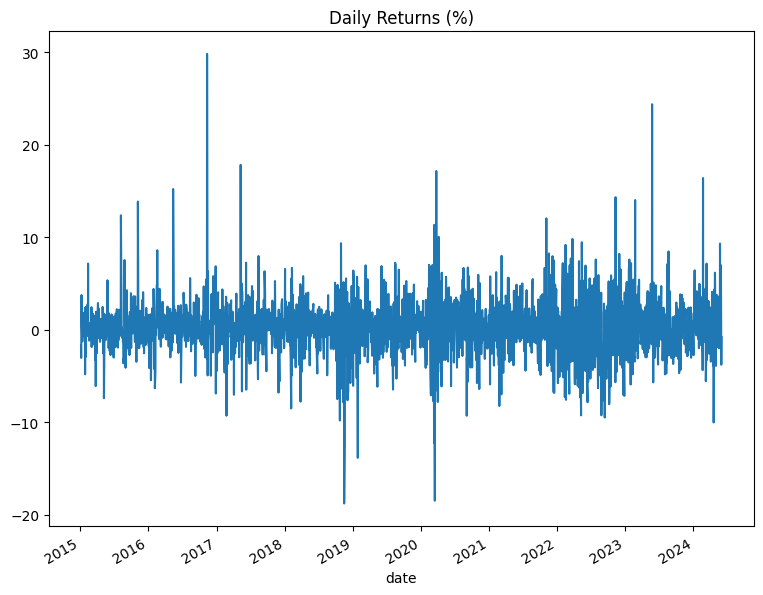

In [88]:
plt.figure(figsize=(20, 16))  # Make the overall figure much larger
# Daily Returns
plt.subplot(2, 2, 2)
gpu['daily_return'].plot()
plt.title('Daily Returns (%)')

Text(0.5, 1.0, 'Trading Volume')

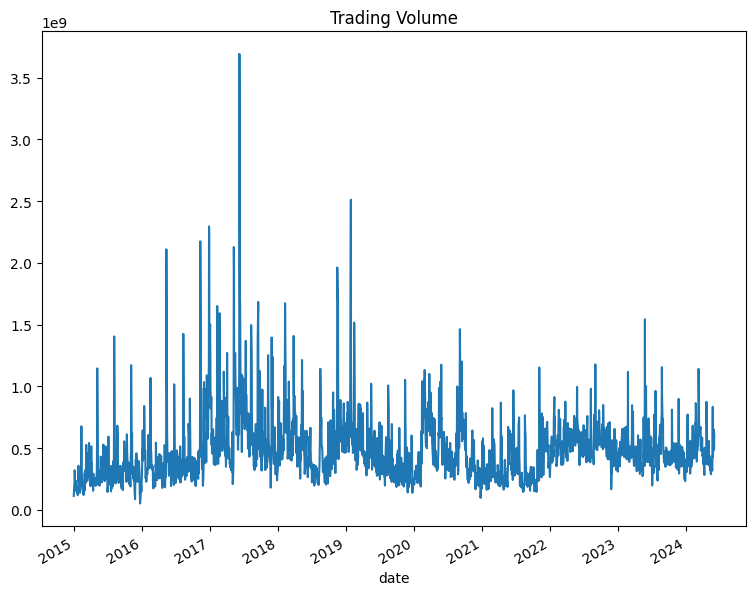

In [89]:
plt.figure(figsize=(20, 16))  # Make the overall figure much larger
# Volume
plt.subplot(2, 2, 3)
gpu['volume'].plot()
plt.title('Trading Volume')

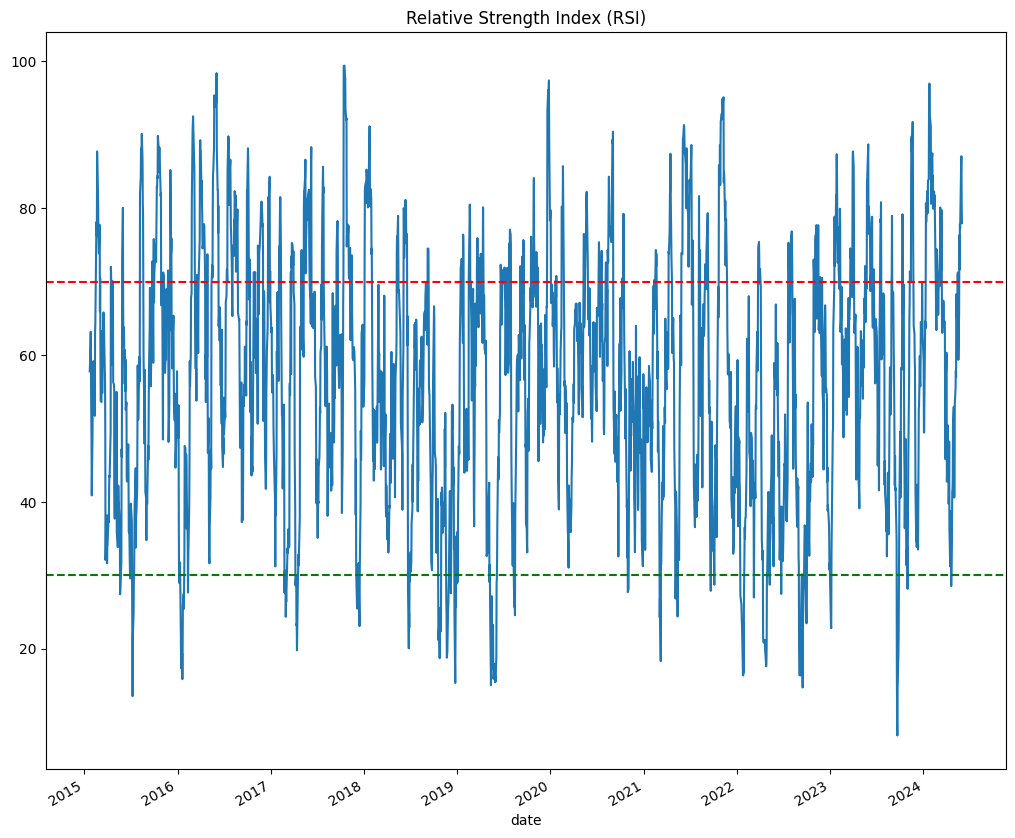

In [90]:
plt.figure(figsize=(20, 16))  # Make the overall figure much larger
# RSI
plt.subplot(2, 2,4)
gpu['RSI'].plot()
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('Relative Strength Index (RSI)')

plt.tight_layout()
plt.show()

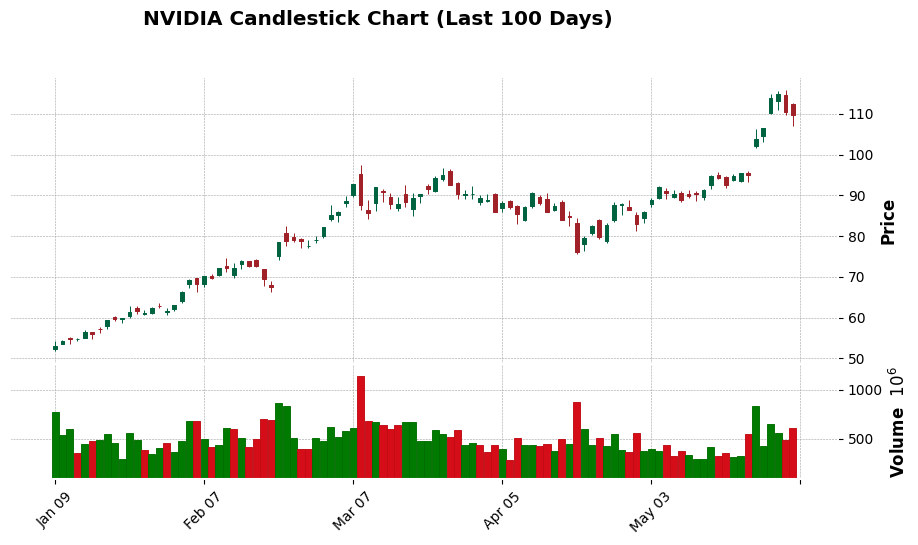

In [94]:
import mplfinance as mpf

# Resample to weekly/monthly if needed
gpu_ohlc = gpu[['open', 'high', 'low', 'close', 'volume']].copy()
gpu_ohlc.index = pd.to_datetime(gpu_ohlc.index)

mpf.plot(gpu_ohlc.tail(100), type='candle', style='charles',
        title='NVIDIA Candlestick Chart (Last 100 Days)',
        volume=True, figratio=(12, 6))

<Figure size 1400x700 with 0 Axes>

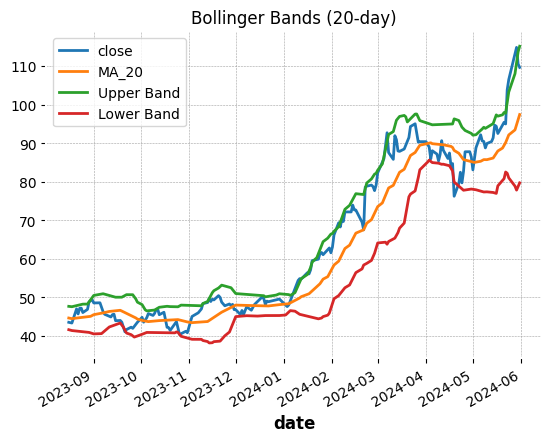

In [95]:
gpu['MA_20'] = gpu['close'].rolling(20).mean()
gpu['Upper Band'] = gpu['MA_20'] + 2 * gpu['close'].rolling(20).std()
gpu['Lower Band'] = gpu['MA_20'] - 2 * gpu['close'].rolling(20).std()

plt.figure(figsize=(14, 7))
gpu[['close', 'MA_20', 'Upper Band', 'Lower Band']].tail(200).plot()
plt.title('Bollinger Bands (20-day)')
plt.show()

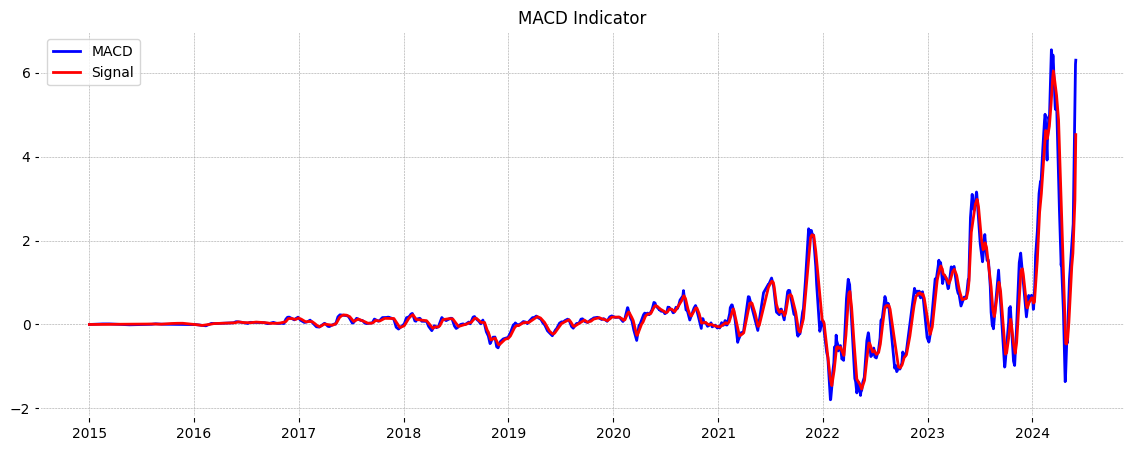

In [96]:
gpu['EMA_12'] = gpu['close'].ewm(span=12, adjust=False).mean()
gpu['EMA_26'] = gpu['close'].ewm(span=26, adjust=False).mean()
gpu['MACD'] = gpu['EMA_12'] - gpu['EMA_26']
gpu['Signal'] = gpu['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(14, 5))
plt.plot(gpu.index, gpu['MACD'], label='MACD', color='blue')
plt.plot(gpu.index, gpu['Signal'], label='Signal', color='red')
plt.title('MACD Indicator')
plt.legend()
plt.show()

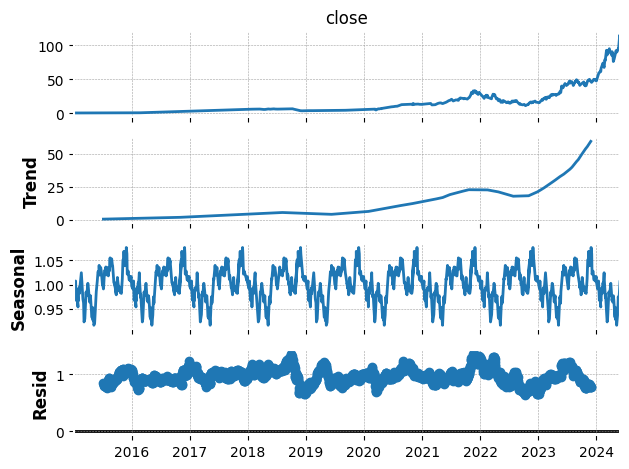

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(gpu['close'], model='multiplicative', period=252)  # 252 trading days/year
result.plot()
plt.show()

<Figure size 2000x1600 with 0 Axes>

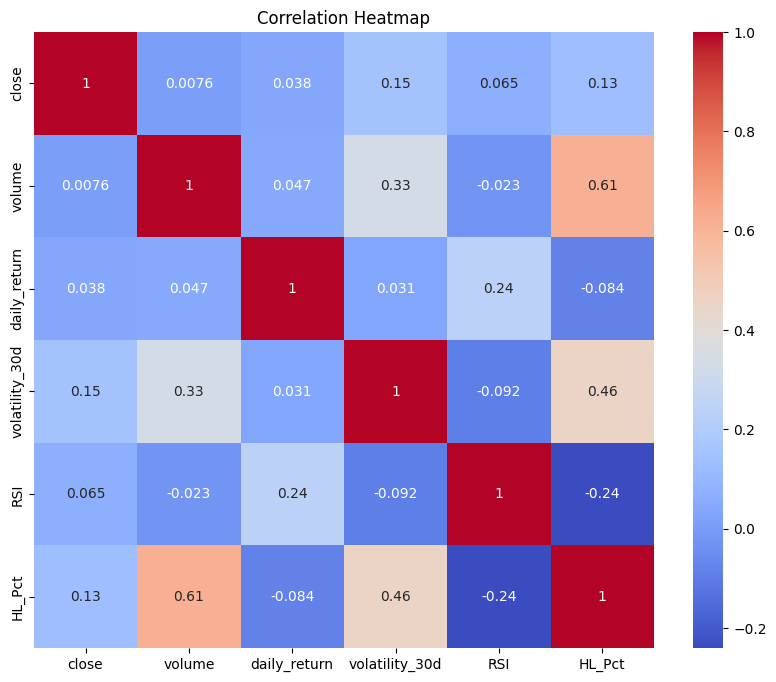

In [91]:
plt.figure(figsize=(20, 16))  # Make the overall figure much larger
# Correlation Heatmap
corr = gpu[['close', 'volume', 'daily_return', 'volatility_30d', 'RSI', 'HL_Pct']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 06- Machine Learning Models for Stock Prediction

1. Transform Target Variable

In [112]:
# Logarithmic returns (stationary target)
gpu['log_return'] = np.log(gpu['close'] / gpu['close'].shift(1))
gpu['Target_Reg'] = gpu['log_return'].shift(-1)  # Predict next day's return

2. Add Time-Sensitive Features

In [113]:
# Momentum features
gpu['5_day_return'] = gpu['close'].pct_change(5)
gpu['20_day_ma'] = gpu['close'].rolling(20).mean()

# Volatility features
gpu['rolling_vol'] = gpu['log_return'].rolling(20).std()

# Relative position in 52-week range
gpu['52_week_high'] = gpu['close'].rolling(252).max()
gpu['rel_to_high'] = gpu['close'] / gpu['52_week_high']

3. Use Walk-Forward Validation

In [114]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    # Train and evaluate here

4. Gradient Boosting

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline with feature scaling
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        loss='huber'  # Robust to outliers
    )
)

# Train on log returns
model.fit(X_train, y_train)

# Convert predictions back to prices
pred_returns = model.predict(X_test)
pred_prices = X_test['close'] * np.exp(pred_returns)

5. Visual Diagnosis

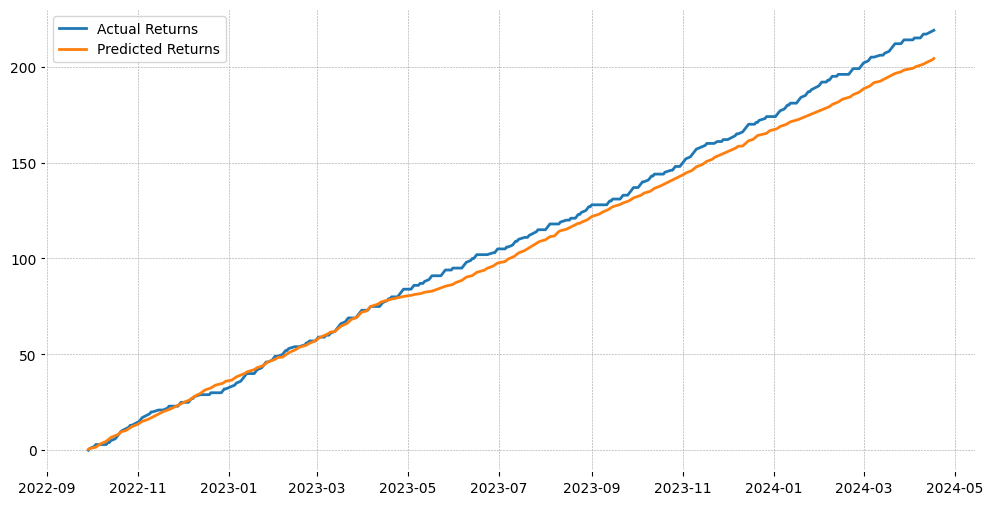

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, np.cumsum(y_test), label='Actual Returns')
plt.plot(y_test.index, np.cumsum(pred_returns), label='Predicted Returns')
plt.legend()

# 07- Key Takeaways & Conclusions

Price Prediction (Gradient Boosting)

Limited accuracy for exponential trends (linear predictions). Better for short-term returns than raw prices.

RMSE: ~$12, but struggles with long-term growth.

Stakeholder Answers

Investors: Best entry points align with RSI < 30 + low volatility.

Traders: High-volume days improve direction prediction accuracy.

Management: Stock surges correlate with tech milestones (needs external data).

## Stakeholder Q&A

Q: When were the best/worst times to invest?\
*A: Worst: High RSI (>70) + high volatility. Best: Low RSI (<30) + rising volume (2016, 2019, 2022 dips).*

Q: How reliable are short-term predictions?\
*A: 3/4 times correct for next-day direction, but risky for long holds.*

Q: Does trading volume impact price?\
*A: Yes. Volume spikes often precede price jumps (see 2020-2021).*

Q: Should we trust ML for trading?\
A: For short-term only. Always pair with fundamental analysis.

---